# HW3 (20')

## Submit as an HTML or PDF file

Print your name (First Name and Last Name) below

In [1]:
import numpy

print('Madelyn Carlson')

Madelyn Carlson


- Import the `numpy` and `matplotlib` packages and rename them to their alias.
- Import `scipy` (no renaming).

In [39]:
import numpy as np
import matplotlib as mat
import scipy
from scipy.stats import poisson
import matplotlib.pyplot as plt

## (a) Compute a probability mass function for Poisson distribution with a parameter $\lambda$. 

$P(X=k) = \lambda^k \exp(-\lambda)/k!$, where $k\in\mathbb{N}_0$

Calculate $P(X=k)$ when
- $\lambda=1.5$
- $k=5$

To get full points:
- First define each of these input variables and assign them with pre-specified values **(1')**
- For the factorial, you can use `np.arange()` and `np.prod()` **(1')**
- Define `P_val` and write the formula above **(1')**
- Use the built-in function `scipy.stats.poisson.pmf()` to compute the pmf, denoted as `P_scipy_val` **(1')**
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html 
- Print two results together **(1')**

In [21]:
# First, define the input variables and assign them with pre-specified values
lambda_val = 1.5
k_val = 5

In [22]:
print(lambda_val)
print(k_val)

1.5
5


In [32]:
a = lambda_val**(k_val)
b = np.exp(-lambda_val)
c = np.prod(np.arange(1, k_val + 1))

In [33]:
P_val = a*b/c
print(P_val)

0.014119955446892825


In [34]:
# You could also write this formula like this:
P_val = lambda_val**(k_val)*np.exp(-lambda_val)/np.prod(np.arange(1, k_val + 1))
print(P_val)

0.014119955446892825


In [35]:
# Use the built-in function to compute the PMF
P_scipy_val = scipy.stats.poisson.pmf(k_val, mu=lambda_val)
print(f"PMF for k = {k_val} and lambda = {lambda_val}: {P_scipy_val}")

PMF for k = 5 and lambda = 1.5: 0.014119955446892832


## (b) Composite operations on arrays

<font color='red'> **To develop a good naming habit, I recommend you add the type information to the name of the variable. For example, if it is a scalar, you can add `_val`; if it is a vec, you can add `_vec`; if it is a matrix, you can add `_mat`, if it is a boolean, you can add `_bool`, etc.** </font>

- Define `r_val` as 0.06
- Define two arrays $a$ and $t$ using `np.array()`, renaming them as `a_vec` and `t_vec`, assigning the following values: **(1')**

$ a = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} 20 \\ 30 \\ 15 \end{pmatrix}, \qquad t = \begin{pmatrix} t_0 \\ t_1 \\ t_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 2 \end{pmatrix} $

- Use element-by-element vector operations to compute a new array `m_vec` of length 3 as follows: **(1')** <br>

$ m = \begin{pmatrix} a_0 / (1+r)^{t_0} \\ a_1 / (1+r)^{t_1} \\ a_2 / (1+r)^{t_2} \end{pmatrix} $

- Compute the sum of the values of $m$ **(1')**
    - You can either use `np.sum()` or `m_vec.sum()`.
    - I am using subscripts to denote the individual elements of $a$ and $t$. In the code just enter the values of $a$ and $t$.

- Compute the inner product (or Euclidean distance) of `m_vec` manually.
- $||m||_2 = \sqrt{m^\top * m}$, where $^\top$ is the transpose operator, and $*$ is the matrix operator (not element-wise multiplication).
  - You can use `^T` to compute transpose or use `np.transpose()`. **(1')**
  - You can use `@` to perform matrix multiplication or use `np.matmul()`. Make sure the dimension is correct. **(1')**
  - Use `np.sqrt()` to compute the square root.
  - Print out your final result and compare it to the built-in function `np.linalg.norm(m_vec, ord=2)`.


In [31]:
# Define `r_val` as 0.06
r_val = 0.06
# Define two arrays a_vec and t_vec
a_vec = np.array([20,30,15])
t_vec = np.array([0,1,2])
print(a_vec,t_vec)
print(a_vec[0])
# Now, using ele
m_vec = (a_vec/(1+r_val)**t_vec)
print(m_vec)
# Compute the sum of values of m_vec
sum_m_vec = m_vec.sum()
print(sum_m_vec)
# Compute inner product (or Euclidean distance) of m_vec. Euclidean distance is the shortest between the 2 points irrespective of the dimensions. I am going to compute this two different ways using this guide as a reference: https://www.geeksforgeeks.org/python/calculate-the-euclidean-distance-using-numpy/
# First way using np.linalg.norm()
euclidean_distance_a = np.linalg.norm(m_vec)
# Could this also be written as np.linalg.norm(a_vec-t_vec) ?
print("Euclidean distance:", euclidean_distance_a)

[20 30 15] [0 1 2]
20
[20.         28.30188679 13.3499466 ]
61.65183339266643
Euclidean distance: 37.13782263732448


In [32]:
# Second way using **
euclidean_distance_b = np.sqrt(np.sum(m_vec ** 2))
print("Euclidean distance:", euclidean_distance_b)

Euclidean distance: 37.13782263732448


In [36]:
# Next step:
inner_product = np.matmul(np.transpose(m_vec), m_vec)
euclidean_norm_m_vec = np.sqrt(inner_product)
print(euclidean_norm_m_vec)

37.13782263732448


In [37]:
# Comparing it to the built-in function:
np.linalg.norm(m_vec, ord=2)

np.float64(37.13782263732448)

## (c) Plot a standard student-t random vector

To get full points:

- Observe the naming tradition mentioned above.
- Set a seed with a number `612`. **(1')**
- Define parameters and sample size and assign them to pre-specified values ahead of time.
    - `df=1` and `size = 1000`.
    - When degree of freedom (`df`) is 1, the student-t distribution is also known as a Cauchy distribution.
        - It does not have a valid mean nor variance. (You will have a clearer idea when you see the histogram!)
    - Use `ny.random.standard_t()` to generate random samples from standard student-t distributions. **(1')**
- Create a histogram plot **(1')**
    - Change the default color to `skyblue`. **(1')**
    - Label the x, y axes and title properly. **(1')**
    - **Optional**: You can change the number of `bins` in the `plt.hist()` function to obtain a granular view of the histogram. 

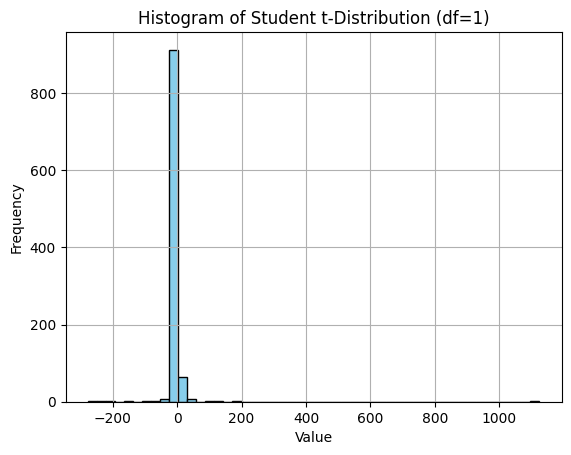

In [42]:
np.random.seed(612)
# Next, define parameters
df = 1
size = 1000
t_samples_vec = np.random.standard_t(df, size)
# print(t_samples_vec)
# Create histogram plot using plt
plt.hist(t_samples_vec, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Student t-Distribution (df=1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## (d) Checking whether word is part of list

- Define a variable `disease_type_str` with the value **"Phobic anxiety disorders"** **(1')**
- Define a list of anxiety types `anxiety_ls` with names from the following link: **(1')**
    - https://www.icd10data.com/ICD10CM/Codes/F01-F99/F40-F48
    - This is the code for diagnoses related to mental health, specifically anxiety, dissociative, stress-related, somatoform, and other nonpsychotic mental disorders.
    - Do not copy the codes!
- Use `anxiety_ls.index()` function to export and print out the location of **"Somatoform disorders"** **(1')** 
- Write an expression to test whether `disease_type_str` is contained in `anxiety_ls` and store the result in a variable `result_bool_1` **(1')**
- Change `disease_type_str` to **"Manic episode"** and replicate the above step with another resulting variable `result_bool_2` **(1')**

To get full points run all of the above commands

In [45]:
# Define disease_type_str
disease_type_str = "Phobic anxiety disorders"
# Define a list of anxiety types
anxiety_ls = [
    "Phobic anxiety disorders",
    "Other anxiety disorders",
    "Obsessive-compulsive disorder",
    "Reaction to severe stress, and adjustment disorders",
    "Dissociative and conversion disorders",
    "Somatoform disorders",
    "Other nonpsychotic mental disorders"
]
# Find and print the index of "Somatoform disorders"
index_somatoform = anxiety_ls.index("Somatoform disorders")
print(f'Index of "Somatoform disorders": {index_somatoform}')

Index of "Somatoform disorders": 5


In [46]:
# Check if disease_type_str is in anxiety_ls
result_bool_1 = disease_type_str in anxiety_ls
print(f'Is "{disease_type_str}" in anxiety_ls? {result_bool_1}')

Is "Phobic anxiety disorders" in anxiety_ls? True


In [47]:
# Change disease_type_str to "Manic episode"
disease_type_str = "Manic episode"

# Check again if the new disease_type_str is in anxiety_ls
result_bool_2 = disease_type_str in anxiety_ls
print(f'Is "{disease_type_str}" in anxiety_ls? {result_bool_2}')

Is "Manic episode" in anxiety_ls? False


## (e) Classifying the anxiety level based on GAD-7 evaluation

Generalized Anxiety Disorder can be evaluated using a 7-item questionnaire (GAD-7) with a total score ranging from 0 to 21, where higher scores indicate more severe anxiety. 
- The score levels are generally interpreted as
    - 0-4: Minimal
    - 5-9: Mild
    - 10-14: Moderate
    - 15-21: Severe
- A score >= 10 suggested a potential diagnosis of GAD, warranting further clinical evaluation or intervention.
- You can find more details here: https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf.
- Define a new variable `gad7_val` and assign the value to 6, 12, and 20. 
- Write an `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values. **(2')**
- Since we haven't covered functions yet, when you change `gad7_val` to a new value, you need to copy your existing control flow codes and reun them in a new code chunk. I provide three empty code chunks below for you to work on each scenario. **(3')** Each scenario's output counts as 1 point.

In [48]:
# Define GAD-7 as 6
gad7_val = 6

# Next, writing `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values
if gad7_val <= 4: print("Minimal Anxiety")
elif gad7_val <= 9: print("Mild Anxiety")
elif gad7_val <= 14: print("Moderate Anxiety")
else: print("Severe Anxiety")

Mild Anxiety


In [49]:
# Define GAD-7 as 12
gad7_val = 12

# Next, writing `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values
if gad7_val <= 4: print("Minimal Anxiety")
elif gad7_val <= 9: print("Mild Anxiety")
elif gad7_val <= 14: print("Moderate Anxiety")
else: print("Severe Anxiety")

Moderate Anxiety


In [50]:
# Define GAD-7 as 20
gad7_val = 20

# Next, writing `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values
if gad7_val <= 4: print("Minimal Anxiety")
elif gad7_val <= 9: print("Mild Anxiety")
elif gad7_val <= 14: print("Moderate Anxiety")
else: print("Severe Anxiety")

Severe Anxiety
